In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


# 卷积自动编码器

In [8]:
%tensorflow_version 1.x
import pandas as pd  #import pandas
import numpy as np
import math
import matplotlib.pyplot as plt
from math import log,sqrt,exp
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D  # 空间三维画图
from matplotlib import cm
import matplotlib as mpl
from PIL import Image ## 生成GIF图
from datetime import datetime,timedelta
from scipy.spatial.distance import cdist 
import time
import imageio
import warnings
import sys
import random
from scipy import interpolate
from scipy.integrate import quad
from scipy import integrate

import numpy as np
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.callbacks import TensorBoard
import keras
from sklearn import metrics
import warnings
from sklearn.cluster import *
warnings.filterwarnings("ignore")


TensorFlow 1.x selected.


Using TensorFlow backend.


In [16]:
import pickle
MMM = pickle.load(open("drive/My Drive/MMMnew" ,'rb'))## 读取到dict_x矩阵里面
X_train = MMM[0:1209,]
X_test = MMM[0:1209,]
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
#Reshape the data to have 1 channel

#In [4]:
print(X_train.shape, X_test.shape)
#(60000, 28, 28) (10000, 28, 28)
#In [5]:
X_train = np.reshape(X_train, (-1, 40, 40, 1))+2
X_test = np.reshape(X_test, (-1, 40, 40, 1))+2
print(X_train.shape, X_test.shape)


(1209, 40, 40) (1209, 40, 40)
(1209, 40, 40, 1) (1209, 40, 40, 1)


In [0]:
def Matrix2suf(M):
  xyz = np.zeros((3,M.shape[0]*M.shape[1]))
  for i in range(M.shape[0]):
    for j in range(M.shape[1]):
      xyz[0,M.shape[1]*i+j] = 0.8+i/40*0.4
      xyz[1,M.shape[1]*i+j] = 0.1+j/40*0.5
      xyz[2,M.shape[1]*i+j] = M[i,j]
  return xyz
  
def conv_output(model, layer_name, img):

    # this is the placeholder for the input images
    input_img = model.input

    try:
        # this is the placeholder for the conv output
        out_conv = model.get_layer(layer_name).output
    except:
        raise Exception('Not layer named {}!'.format(layer_name))

    # get the intermediate layer model
    intermediate_layer_model = Model(inputs=input_img, outputs=out_conv)

    # get the output of intermediate layer model
    intermediate_output = intermediate_layer_model.predict(img)

    return intermediate_output#[0]

#模型一 自动编码器线性

In [0]:


input_img = Input(shape=(1600,))
x1 = Dense(100, activation='sigmoid',name='encoder_dense1')(input_img)
encoded = Dense(, activation='tanh',name='encoded')(input_img)
y1 = Dense(100, activation='sigmoid',name='decoder_dense')(encoded)
decoded = Dense(1600, activation='sigmoid',name = 'decoded')(encoded)
autoencoder_dense = Model(input_img, decoded)

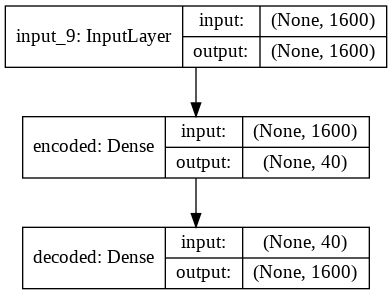

In [0]:
autoencoder_dense.compile(optimizer='adam', loss='mse')
from keras.utils import plot_model
plot_model(autoencoder_dense, to_file='drive/My Drive/THESIS/model_dense.png',rankdir='TB',show_shapes=True,expand_nested=True)

In [0]:
X_train.reshape(-1,1600).shape

(1209, 1600, 1)

In [0]:

tbCallBack = TensorBoard(log_dir="drive/My Drive/model/dense", histogram_freq=0,write_grads=True,write_images=True,write_graph=True)
History = autoencoder_dense.fit(X_train.reshape(1209,1600), X_train.reshape(1209,1600),
                batch_size=30,epochs=3000,verbose=2,validation_split=0.2,callbacks = [tbCallBack])

Train on 967 samples, validate on 242 samples
Epoch 1/3000
 - 0s - loss: 1.9473 - val_loss: 1.5545
Epoch 2/3000
 - 0s - loss: 1.4068 - val_loss: 1.2565
Epoch 3/3000
 - 0s - loss: 1.2279 - val_loss: 1.1611
Epoch 4/3000
 - 0s - loss: 1.1632 - val_loss: 1.1193
Epoch 5/3000
 - 0s - loss: 1.1318 - val_loss: 1.0965
Epoch 6/3000
 - 0s - loss: 1.1136 - val_loss: 1.0823
Epoch 7/3000
 - 0s - loss: 1.1019 - val_loss: 1.0728
Epoch 8/3000
 - 0s - loss: 1.0939 - val_loss: 1.0661
Epoch 9/3000
 - 0s - loss: 1.0880 - val_loss: 1.0611
Epoch 10/3000
 - 0s - loss: 1.0836 - val_loss: 1.0573
Epoch 11/3000
 - 0s - loss: 1.0803 - val_loss: 1.0543
Epoch 12/3000
 - 0s - loss: 1.0776 - val_loss: 1.0519
Epoch 13/3000
 - 0s - loss: 1.0754 - val_loss: 1.0499
Epoch 14/3000
 - 0s - loss: 1.0736 - val_loss: 1.0483
Epoch 15/3000
 - 0s - loss: 1.0721 - val_loss: 1.0469
Epoch 16/3000
 - 0s - loss: 1.0708 - val_loss: 1.0457
Epoch 17/3000
 - 0s - loss: 1.0697 - val_loss: 1.0448
Epoch 18/3000
 - 0s - loss: 1.0688 - val_loss

KeyboardInterrupt: ignored

In [0]:
autoencoder_dense.save('drive/My Drive/THESIS/autoencoder_dense.h5')

In [0]:
autoencoder = keras.models.load_model('drive/My Drive/THESIS/autoencoder_dense.h5')

In [0]:
autoencoder_dense.predict(X_test[4].reshape(-1,1,1600)).reshape(40,40)

array([[0.999994  , 0.9999937 , 0.99999416, ..., 0.9999926 , 0.9999928 ,
        0.99999225],
       [0.9999934 , 0.9999943 , 0.9999932 , ..., 0.9999931 , 0.9999919 ,
        0.99999356],
       [0.99999344, 0.99999315, 0.9999938 , ..., 0.9999942 , 0.99999416,
        0.9999923 ],
       ...,
       [0.99999285, 0.9999939 , 0.99999297, ..., 0.9999932 , 0.9999927 ,
        0.99999356],
       [0.9999931 , 0.9999929 , 0.9999924 , ..., 0.9999938 , 0.9999935 ,
        0.99999356],
       [0.99999297, 0.9999937 , 0.9999935 , ..., 0.9999938 , 0.9999939 ,
        0.99999404]], dtype=float32)

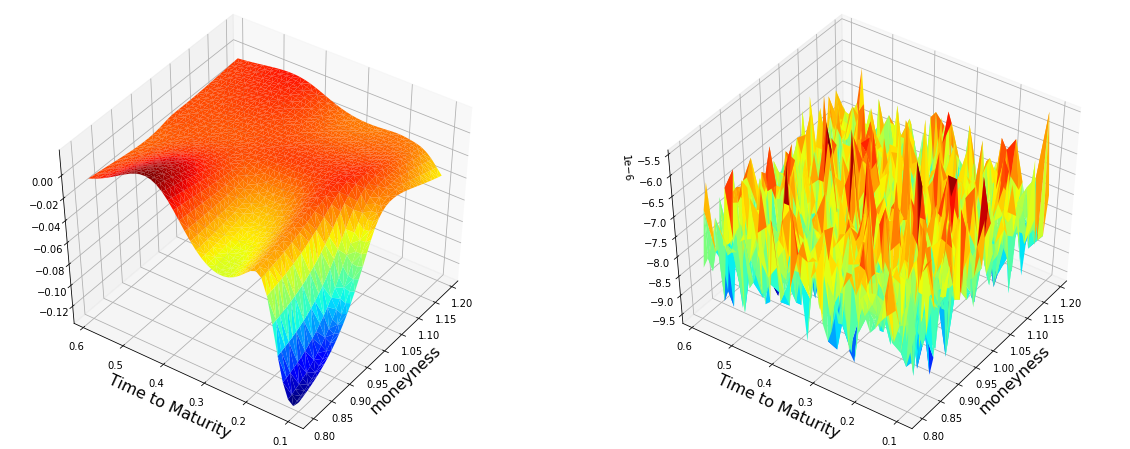

In [0]:

plt.rcParams['figure.figsize'] = (20, 8)
k=[1201]



fig = plt.figure()
for i in range(1):
  ax1 = fig.add_subplot(1, 2, 1, projection='3d')
  fig1 = Matrix2suf(X_test[k[i]].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],0.5*(fig1[2,]-2), cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=16)
  plt.ylabel('Time to Maturity',fontsize=16)
  ax1.view_init(45, -145)

  ax2 = fig.add_subplot(1, 2, 2, projection='3d')
  fig2 = Matrix2suf(autoencoder_dense.predict(X_test[k[i]].reshape(-1,1600)).reshape(40,40))
  ax2.plot_trisurf(fig2[0,],fig2[1,],(fig2[2,]-1), cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=16)
  plt.ylabel('Time to Maturity',fontsize=16)
  ax2.view_init(45, -145)


In [0]:
fig2[2,]-1

array([-7.86781311e-06, -7.86781311e-06, -7.74860382e-06, ...,
       -7.09295273e-06, -8.46385956e-06, -8.10623169e-06])

# 模型二 卷积神经网络

In [0]:
print(X_train.shape, X_test.shape)

input_img = Input(shape=(40,40,1))
x1 = Conv2D(16,(3,3), padding='same',name='EncodeConv1')(input_img)#activation='relu'
x1 = keras.layers.LeakyReLU(alpha=0.2)(x1)
x2 = MaxPooling2D((2,2), padding='same',name = 'MaxPooling')(x1)
x3 = Conv2D(20,(3,3),  padding='same',name='EncodeConv2')(x2)#activation='relu',
x3 = keras.layers.LeakyReLU(alpha=0.2)(x3)
encoded = MaxPooling2D((2,2), padding='same', name='Encoder')(x3)
#encoded =  Conv2D(3,(1,1), activation='relu', padding='same')(x2)

y1 = keras.layers.convolutional.Conv2DTranspose(20, (3,3), strides=(2, 2), padding='same',name='DecodedConv1')(encoded)
y1 = keras.layers.LeakyReLU(alpha=0.2)(y1)
y2 = keras.layers.convolutional.Conv2DTranspose(16, (3,3), strides=(2, 2), padding='same',name='DecodedConv2')(y1)
y3 = keras.layers.LeakyReLU(alpha=0.2)(y2)
#y1 = Conv2D(20, (3, 3), activation='relu', padding='same',name='DecodedConv1')(encoded)
#y2 = UpSampling2D((2, 2),name = 'UpSampling1')(y1)
#y3 = Conv2D(16, (3, 3), activation='relu', padding='same',name='DecodedConv2')(y2)
#y4 = UpSampling2D((2, 2),name = 'UpSampling2')(y3)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same', name='Decoded')(y3)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

(1209, 40, 40, 1) (1209, 40, 40, 1)




Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 40, 40, 1)         0         
_________________________________________________________________
EncodeConv1 (Conv2D)         (None, 40, 40, 16)        160       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 40, 40, 16)        0         
_________________________________________________________________
MaxPooling (MaxPooling2D)    (None, 20, 20, 16)        0         
_________________________________________________________________
EncodeConv2 (Conv2D)         (None, 20, 20, 20)        2900      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 20, 20, 20)        0         
_________________________________________________________________
Encoder (MaxPooling

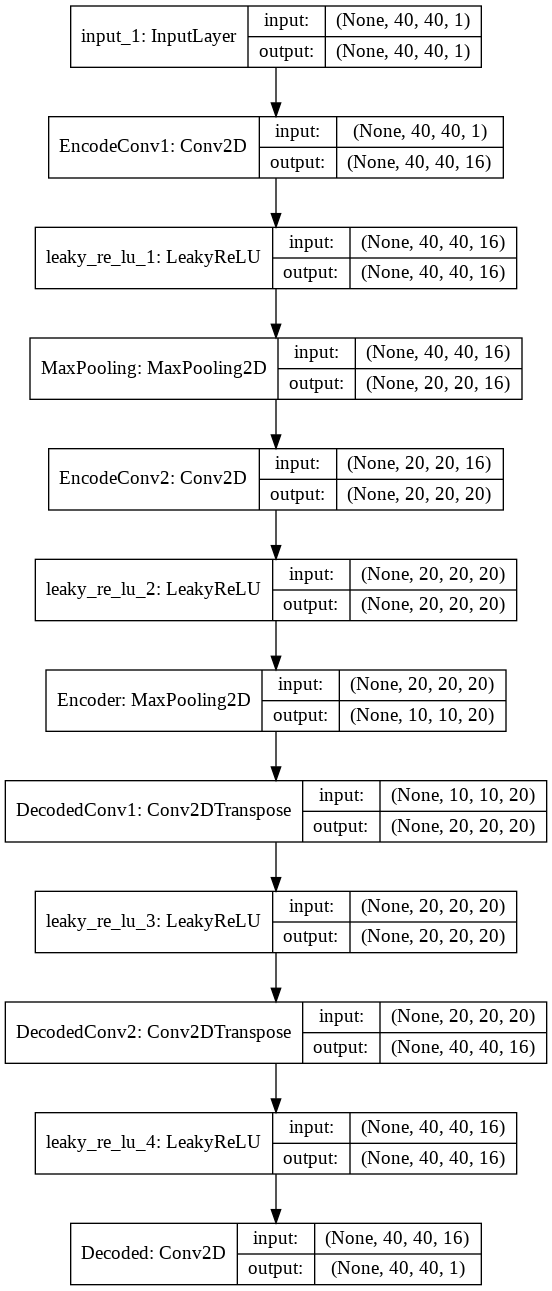

In [0]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='drive/My Drive/THESIS/model.png',rankdir='TB',show_shapes=True,expand_nested=True)

In [0]:


tbCallBack = TensorBoard(log_dir="drive/My Drive/model", histogram_freq=0,write_grads=True,write_images=True,write_graph=True)


In [0]:
import keras
keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-06)
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train, X_train, epochs=3000,verbose=2,batch_size=300,validation_split=0.2, shuffle =True,callbacks=[tbCallBack])

Streaming output truncated to the last 5000 lines.
 - 0s - loss: 9.3980e-04 - val_loss: 4.2138e-04
Epoch 502/3000
 - 0s - loss: 9.2635e-04 - val_loss: 4.0313e-04
Epoch 503/3000
 - 0s - loss: 9.1915e-04 - val_loss: 4.0402e-04
Epoch 504/3000
 - 0s - loss: 9.1783e-04 - val_loss: 4.2527e-04
Epoch 505/3000
 - 0s - loss: 9.6776e-04 - val_loss: 6.3056e-04
Epoch 506/3000
 - 0s - loss: 0.0013 - val_loss: 0.0013
Epoch 507/3000
 - 0s - loss: 0.0019 - val_loss: 7.1430e-04
Epoch 508/3000
 - 0s - loss: 0.0011 - val_loss: 8.4146e-04
Epoch 509/3000
 - 0s - loss: 0.0013 - val_loss: 4.2714e-04
Epoch 510/3000
 - 0s - loss: 0.0010 - val_loss: 7.3595e-04
Epoch 511/3000
 - 0s - loss: 0.0012 - val_loss: 4.0778e-04
Epoch 512/3000
 - 0s - loss: 9.8353e-04 - val_loss: 5.5006e-04
Epoch 513/3000
 - 0s - loss: 9.8230e-04 - val_loss: 4.6031e-04
Epoch 514/3000
 - 0s - loss: 9.7311e-04 - val_loss: 4.3236e-04
Epoch 515/3000
 - 0s - loss: 9.2506e-04 - val_loss: 4.2587e-04
Epoch 516/3000
 - 0s - loss: 9.6157e-04 - val_l

In [0]:
autoencoder.save('drive/My Drive/THESIS/autoencodernew.h5')

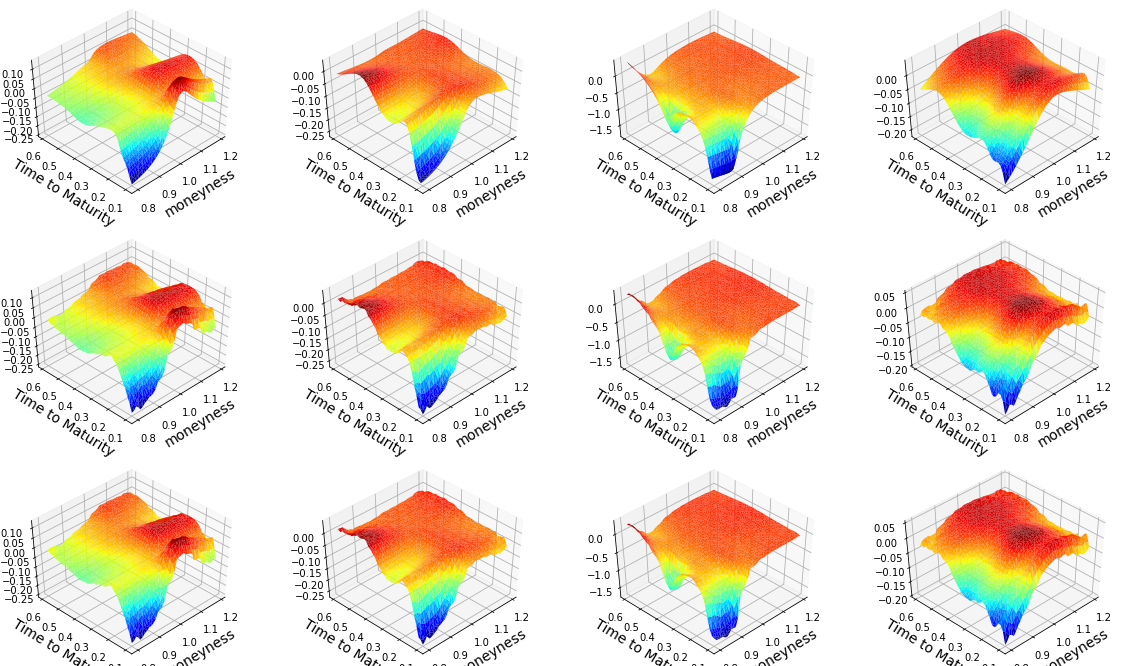

In [0]:

plt.rcParams['figure.figsize'] = (20, 12)
k=[1205,1201,1101,1010]
##aaa = X_test[k]
#aaa_a= autoencoder.predict(aaa.reshape(1,40,40,1))
#plt.subplot(1,2,1)
#plt.imshow(aaa_a.reshape(40,40))
#plt.subplot(1,2,2)
#plt.imshow(X_test[k].reshape(40,40))


m=0
fig = plt.figure()

for i in range(4):


  ax1 = fig.add_subplot(3, 4, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k[m]].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=14)
  plt.ylabel('Time to Maturity',fontsize=14)
  ax1.view_init(45, -135)


  ax2 = fig.add_subplot(3, 4, 5+i, projection='3d')
  fig2 = Matrix2suf(autoencoder.predict(X_test[k[m]].reshape(1,40,40,1)).reshape(40,40))
  ax2.plot_trisurf(fig2[0,],fig2[1,],fig2[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=14)
  plt.ylabel('Time to Maturity',fontsize=14)
  ax2.view_init(45, -135)

  ax2 = fig.add_subplot(3, 4, 9+i, projection='3d')
  fig2 = Matrix2suf(autoencoder.predict(X_test[k[m]].reshape(1,40,40,1)).reshape(40,40))
  ax2.plot_trisurf(fig2[0,],fig2[1,],fig2[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=14)
  plt.ylabel('Time to Maturity',fontsize=14)
  ax2.view_init(45, -135)
  m+=1

## 显卡信息

In [0]:
!/opt/bin/nvidia-smi

/bin/bash: /opt/bin/nvidia-smi: No such file or directory


In [0]:
encoder = autoencoder(inputs=autoencoder.input, outputs=autoencoder.get_layer('Encoder').output)

encoder.save('encoder.h5')
#Load the query image
#We take a query image from the test set

query = X_test[0]
#In [12]:
plt.imshow(query.reshape(40,40), cmap='gray')

X_test.shape
X_test = np.delete(X_test, 0, axis=0)
X_test.shape

codes = encoder.predict(X_test)
query_code = encoder.predict(query.reshape(1,40,40,1))
codes.shape
query_code.shape


TypeError: ignored

## 读取训练好的模型



In [0]:
autoencoder = keras.models.load_model('drive/My Drive/THESIS/autoencoder.h5')

## K-MEANS


### 1、原始数据直接聚类

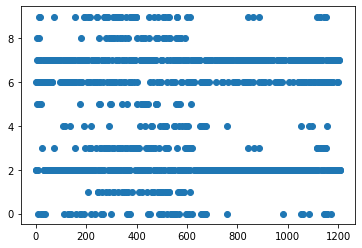

<Figure size 432x288 with 0 Axes>

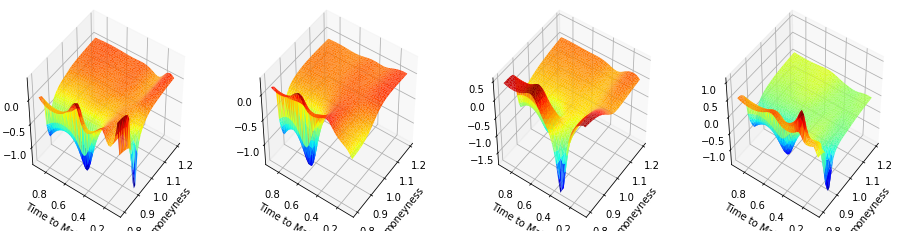

In [0]:

clusters = 10

kmeans_raw = KMeans(n_clusters=clusters,algorithm='auto', copy_x=True, init='k-means++', max_iter=3,
        n_init=10, n_jobs=10, precompute_distances='auto',
       random_state=None, tol=0.001, verbose=0)
kmeans_raw.fit(X_test.reshape(1209,1600))
Kmeans_raw_result = kmeans_raw.predict(X_test.reshape(1209,1600))
plt.scatter(range(1209),Kmeans_raw_result)


plt.figure(0)
plt.rcParams['figure.figsize'] = (16, 4)

import seaborn as sns


fig = plt.figure()
for i in range(4):
  k = np.where(Kmeans_raw_result==1)[0][i]
  ax1 = fig.add_subplot(1, 4, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -145)

### 2、K-means 聚类

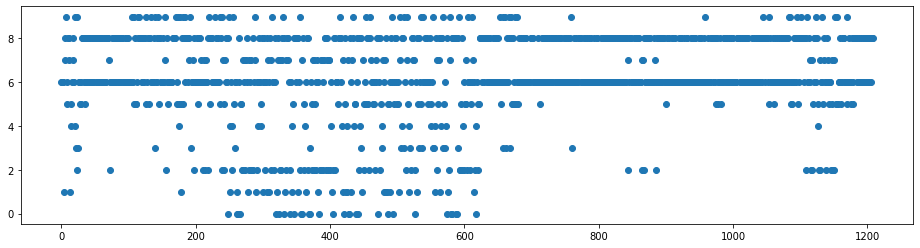

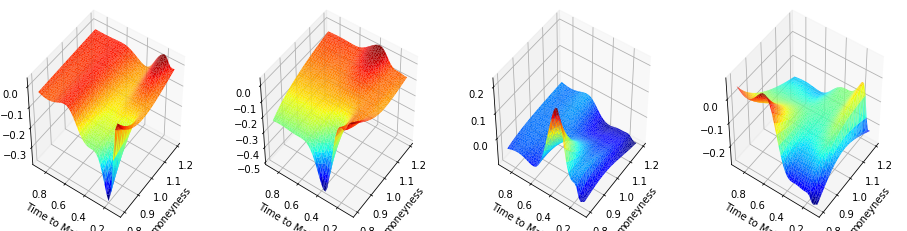

In [0]:
layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))

hidden_feature = layer.reshape(1209,2000)
kmeans = KMeans(n_clusters=clusters,algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,
        n_init=10, n_jobs=100, precompute_distances='auto',
       random_state=None, tol=0.0000001, verbose=0)
kmeans.fit(hidden_feature)
Kmeans_result = kmeans.predict(hidden_feature)
plt.scatter(range(1209),Kmeans_result)


plt.rcParams['figure.figsize'] = (16, 4)

import seaborn as sns


fig = plt.figure()
for i in range(4):
  k = np.where(Kmeans_result==6)[0][i]
  ax1 = fig.add_subplot(1, 4, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -145)

### 3、Spectral聚类

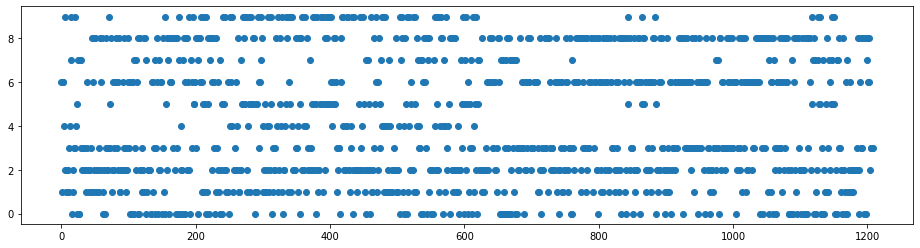

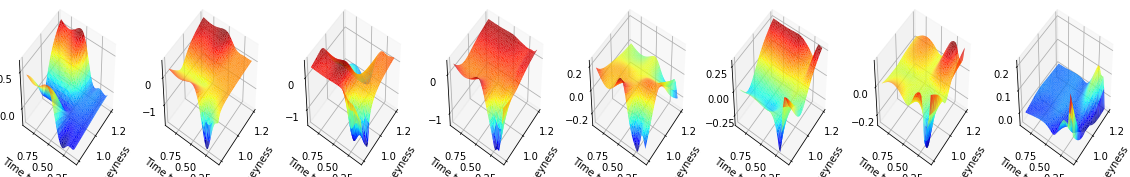

In [0]:
S = SpectralClustering(n_clusters=clusters, eigen_solver=None, n_components=None, random_state=None, n_init=100, gamma=0.00001, affinity='nearest_neighbors', n_neighbors=10, eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=1000)
spectral_result = S.fit_predict(hidden_feature)

plt.scatter(range(1209),spectral_result)

plt.rcParams['figure.figsize'] = (20, 3)


fig = plt.figure()
for i in range(8):
  k = np.where(spectral_result==3)[0][i]
  ax1 = fig.add_subplot(1, 8, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -145)

In [0]:
Agglomerative = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
Agglomerative_result = Agglomerative.fit_predict(hidden_feature)
plt.scatter(range(1209),spectral_result)

plt.rcParams['figure.figsize'] = (20, 3)


fig = plt.figure()
for i in range(8):
  k = np.where(Agglomerative_result==3)[0][i]
  ax1 = fig.add_subplot(1, 8, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -145)

NameError: ignored

### 4、层聚类

## 4、评估聚类性能


### K-means

In [0]:
clusters = 20
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 

KmeansM= np.zeros((clusters,3))
for i in range(2,clusters+2):

  layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))

  hidden_feature = layer.reshape(1209,600)
  kmeans = KMeans(n_clusters=i,algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
          n_init=10, n_jobs=100, precompute_distances='auto',
        random_state=None, tol=0.0001, verbose=0)
  kmeans.fit(hidden_feature)
  Kmeans_result = kmeans.predict(hidden_feature)

  X=hidden_feature
  distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
  inertias.append(kmeans.inertia_) 
  
  mapping1[i] = sum(np.min(cdist(X, kmeans.cluster_centers_, 
                 'euclidean'),axis=1)) / X.shape[0] 
  mapping2[i] = kmeans.inertia_ 

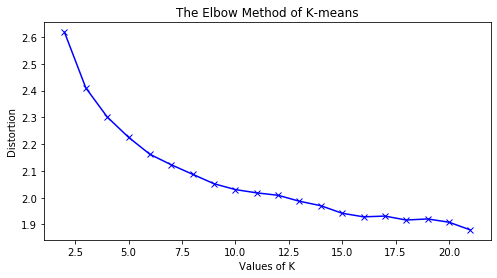

In [0]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(range(2,clusters+2), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method of K-means') 
plt.show() 

### 层聚类

In [0]:
clusters = 20
distortions = [] 

for i in range(2,clusters+2):

  layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))

  hidden_feature = layer.reshape(1209,600)
  Agglomerative = AgglomerativeClustering(n_clusters=i, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None)
  Agglomerative.fit(hidden_feature)
  Agglomerative_result = Agglomerative.fit_predict(hidden_feature)

  X=hidden_feature

  AgglomerativeCenter=np.zeros((i,600))
  for j in range(i):
    temp = X.take(np.where(Agglomerative_result==j)[0],axis = 0)
    AgglomerativeCenter[j,:] = np.mean(temp, axis=0)
  distortions.append(sum(np.min(cdist(X, AgglomerativeCenter, 
                      'euclidean'),axis=1)) / X.shape[0]) 



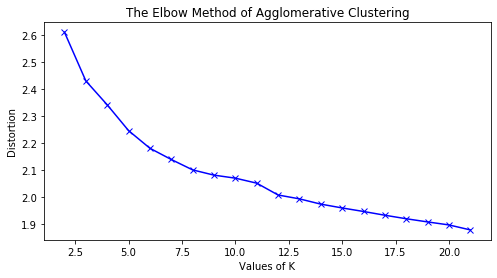

In [0]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(range(2,clusters+2), distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method of Agglomerative Clustering') 
plt.show() 

In [30]:
layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))
hidden_feature = layer.reshape(1209,600)
for k in range(8,9):
  kmeans = KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=30000,n_init=10, n_jobs=100, precompute_distances=False,random_state=True, tol=0.000001, verbose=0)
  #  kmeans.fit(hidden_feature)
  Kmeans_result = kmeans.fit_predict(hidden_feature)
  print(k)
  print(metrics.silhouette_score(X_test.reshape(1209,1600), Kmeans_result, metric='euclidean'))#越大越好
  print(metrics.calinski_harabasz_score(X_test.reshape(1209,1600), Kmeans_result))#越大越好
  print(metrics.davies_bouldin_score(X_test.reshape(1209,1600), Kmeans_result))#越小越好X_test.reshape(1209,1600)


  kmeans = KMeans(n_clusters=k,algorithm='auto', copy_x=False,  max_iter=1,n_init=10, n_jobs=10, precompute_distances=True,random_state=None, tol=0.1, verbose=2)
  #AgglomerativeClustering(n_clusters=k, memory=None, connectivity=None, compute_full_tree='auto', linkage='average', distance_threshold=None)
  kmeans.fit(X_test.reshape(1209,1600))

  Kmeans_result = kmeans.fit_predict(X_test.reshape(1209,1600))
  print(k)
  print(metrics.silhouette_score(X_test.reshape(1209,1600), Kmeans_result, metric='euclidean'))#越大越好
  print(metrics.calinski_harabasz_score(X_test.reshape(1209,1600), Kmeans_result))#越大越好
  print(metrics.davies_bouldin_score(X_test.reshape(1209,1600), Kmeans_result))#越小越好X_test.reshape(1209,1600)
  print('------------------')

8
0.17765239
353.5653161146106
1.4958274797658355
8
0.1478116
333.48626542111055
1.5994242303342319
------------------


In [0]:

for k in range(2,11):
  kmeans = KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=30,n_init=10, n_jobs=100, precompute_distances=True,random_state=True, tol=0.0000001, verbose=0)
  kmeans.fit(hidden_feature)
  Kmeans_result = kmeans.fit_predict(hidden_feature)
  print(k)
  print(metrics.silhouette_score(X_test.reshape(1209,1600), Kmeans_result, metric='l2'))#越大越好
  print(metrics.calinski_harabasz_score(X_test.reshape(1209,1600), Kmeans_result))#越大越好
  print(metrics.davies_bouldin_score(X_test.reshape(1209,1600), Kmeans_result))#越小越好X_test.reshape(1209,1600)


  kmeans1 = KMeans(n_clusters=k,algorithm='auto', copy_x=True, max_iter=30,n_init=10, n_jobs=100, precompute_distances=True,random_state=None, tol=0.0001, verbose=0)
  kmeans1.fit(X_test.reshape(1209,1600))

  Kmeans_result1 = kmeans1.fit_predict(X_test.reshape(1209,1600))
  print(k)
  print(metrics.silhouette_score(X_test.reshape(1209,1600), Kmeans_result1, metric='l2'))#越大越好
  print(metrics.calinski_harabasz_score(X_test.reshape(1209,1600), Kmeans_result1))#越大越好
  print(metrics.davies_bouldin_score(X_test.reshape(1209,1600), Kmeans_result1))#越小越好X_test.reshape(1209,1600)
  print('------------------')

NameError: ignored

### mean-shifted

In [0]:
k = 8
  layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))

  hidden_feature = layer.reshape(1209,600)
  kmeans =KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,n_init=10, n_jobs=100, precompute_distances=True,random_state=None, tol=0.000001, verbose=0)
#AgglomerativeClustering(n_clusters=k,memory=None, connectivity=None, compute_full_tree='auto', linkage='complete', distance_threshold=None)
  #KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,n_init=10, n_jobs=100, precompute_distances=True,random_state=None, tol=0.000001, verbose=0)
  kmeans.fit(hidden_feature)
  Kmeans_result = kmeans.fit_predict(hidden_feature)


In [0]:
import pickle                                                               ## 这里定义的是存储矩阵，存储到文件夹X Y中，矩阵和Y


f = open('drive/My Drive/THESIS/KMEANS8','wb')
pickle.dump(  Kmeans_result,f)
f.close

g = open('drive/My Drive/THESIS/temp','wb')
pickle.dump(  i,g)
g.close

<function BufferedWriter.close>

In [3]:
import pickle  
f = open('drive/My Drive/THESIS/KMEANS8','rb')
Kmeans_result = pickle.load(f)
f.close

<function BufferedReader.close>

In [0]:
plt.rcParams['figure.figsize'] = (24, 16)

X=X_test.reshape(1209,1600)
i=8
AgglomerativeCenter=np.zeros((i,1600))
average = np.zeros((i,1))
count
fig = plt.figure()
for j in range(i):
  temp = X.take(np.where(Kmeans_result==j)[0],axis = 0)
  AgglomerativeCenter[j,:] = np.mean(temp, axis=0)
  average[j]=np.average(AgglomerativeCenter[j,:])

  XXX= AgglomerativeCenter[j,:].reshape(40,40)

from collections import Counter
counter = Counter(Kmeans_result)

list=[6,2,3,7,       1,5,4,0]
for s in range(i):
  fig1 = Matrix2suf(AgglomerativeCenter[list[s],:].reshape(40,40))
  ax1 = fig.add_subplot(3, 4, s+1, projection='3d')
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -135)
average-2


fig1 = Matrix2suf(AgglomerativeCenter[list[s],:].reshape(40,40))
ax1 = fig.add_subplot(3, 4, 10, projection='3d')
ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness')
plt.ylabel('Time to Maturity')
ax1.view_init(45, -135)
counter
print(average-2)

NameError: ignored

In [0]:
#这里将不同组进行绘制
plt.rcParams['figure.figsize'] = (20, 8)

colour =['b','r','g','k']
Smarker =['.','*','s','+'] 
z=0

for z in range(4):
  plt.scatter(np.where(Kmeans_result==list[z])[0],np.ones(len(np.where(Kmeans_result==list[z])[0]))*average[list[z]]-2,label='Group '+str(z+1),marker =Smarker[z],color=colour[z],s=100) 
  plt.scatter(np.where(Kmeans_result==list[z+4])[0],np.ones(len(np.where(Kmeans_result==list[z+4])[0]))*average[list[z+4]]-2,label='Group '+str(z+1),marker =Smarker[z],color=colour[z],s=100) 
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Average Implied volatility')


TypeError: ignored

# 最终结果


In [0]:
  k = 8
  layer = conv_output(autoencoder,'Encoder',X_test.reshape(-1,40,40,1))

  hidden_feature = layer.reshape(1209,600)
  kmeans =KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,n_init=10, n_jobs=100, precompute_distances=True,random_state=None, tol=0.000001, verbose=0)
#AgglomerativeClustering(n_clusters=k,memory=None, connectivity=None, compute_full_tree='auto', linkage='complete', distance_threshold=None)
  #KMeans(n_clusters=k,algorithm='auto', copy_x=True, init='k-means++', max_iter=300000,n_init=10, n_jobs=100, precompute_distances=True,random_state=None, tol=0.000001, verbose=0)
  kmeans.fit(hidden_feature)
  Kmeans_result = kmeans.fit_predict(hidden_feature)

Counter({5: 446, 0: 406, 2: 90, 6: 68, 4: 63, 1: 51, 7: 48, 3: 37})
[[ 0.04803692]
 [ 0.17105471]
 [-0.09371326]
 [-0.26848923]
 [ 0.09573958]
 [-0.04307971]
 [-0.13019375]
 [ 0.24566789]]


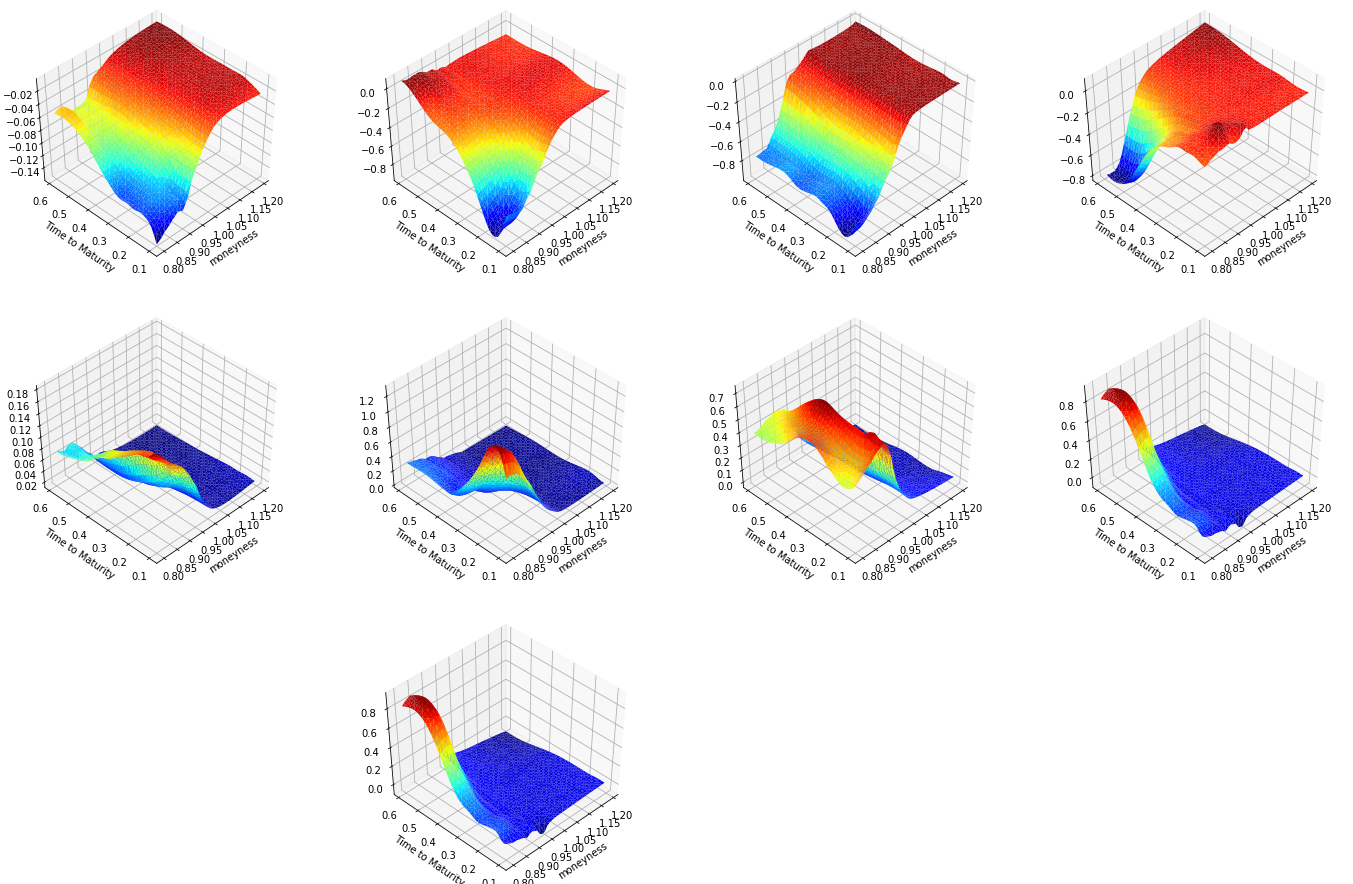

In [0]:
plt.rcParams['figure.figsize'] = (24, 16)

X=X_test.reshape(1209,1600)
i=8
AgglomerativeCenter=np.zeros((i,1600))
average = np.zeros((i,1))

fig = plt.figure()
for j in range(i):
  temp = X.take(np.where(Kmeans_result==j)[0],axis = 0)
  AgglomerativeCenter[j,:] = np.mean(temp, axis=0)
  average[j]=np.average(AgglomerativeCenter[j,:])

  XXX= AgglomerativeCenter[j,:].reshape(40,40)

from collections import Counter
counter = Counter(Kmeans_result)

list=[0,1,2,3,4,5,6,7]
list = [5,6,3,2     ,0,1,7,4]
centerM=np.zeros((8,40,40))
for s in range(i):
  centerM[s,:,:]=AgglomerativeCenter[list[s],:].reshape(40,40)
  fig1 = Matrix2suf(AgglomerativeCenter[list[s],:].reshape(40,40))
  ax1 = fig.add_subplot(3, 4, s+1, projection='3d')
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, -135)
average-2


fig1 = Matrix2suf(AgglomerativeCenter[list[s],:].reshape(40,40))
ax1 = fig.add_subplot(3, 4, 10, projection='3d')
ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness')
plt.ylabel('Time to Maturity')
ax1.view_init(45, -135)
print(counter)
print(average-2)

In [0]:
f = open('drive/My Drive/THESIS/centerM','wb')
pickle.dump(  centerM,f)
f.close

g = open('drive/My Drive/THESIS/averageM','wb')
pickle.dump(  average-2,g)
g.close
h = open('drive/My Drive/THESIS/labelM','wb')
pickle.dump(  Kmeans_result,h)
h.close
h1 = open('drive/My Drive/THESIS/TEMP','wb')
pickle.dump(  i,h1)
h1.close

<function BufferedWriter.close>

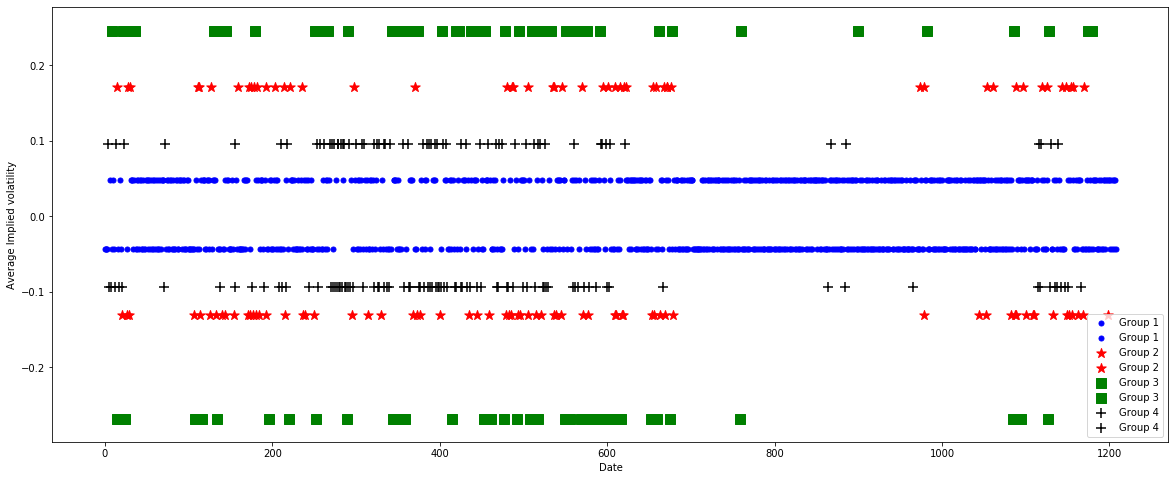

In [0]:
#这里将不同组进行绘制
plt.rcParams['figure.figsize'] = (20, 8)
average-2
colour =['b','r','g','k']
Smarker =['.','*','s','+'] 
z=0

for z in range(4):
  plt.scatter(np.where(Kmeans_result==list[z])[0],np.ones(len(np.where(Kmeans_result==list[z])[0]))*average[list[z]]-2,label='Group '+str(z+1),marker =Smarker[z],color=colour[z],s=100) 
  plt.scatter(np.where(Kmeans_result==list[z+4])[0],np.ones(len(np.where(Kmeans_result==list[z+4])[0]))*average[list[z+4]]-2,label='Group '+str(z+1),marker =Smarker[z],color=colour[z],s=100) 
  plt.legend()
  plt.xlabel('Date')
  plt.ylabel('Average Implied volatility')

# 隐含层特征


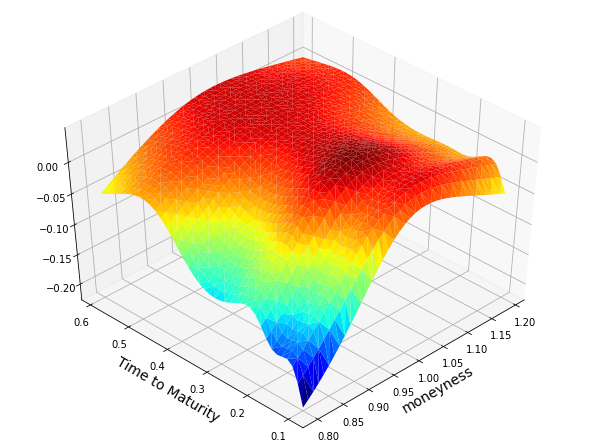

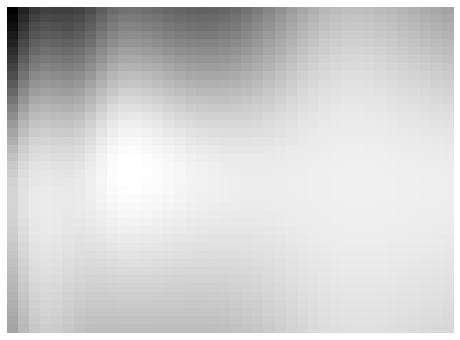

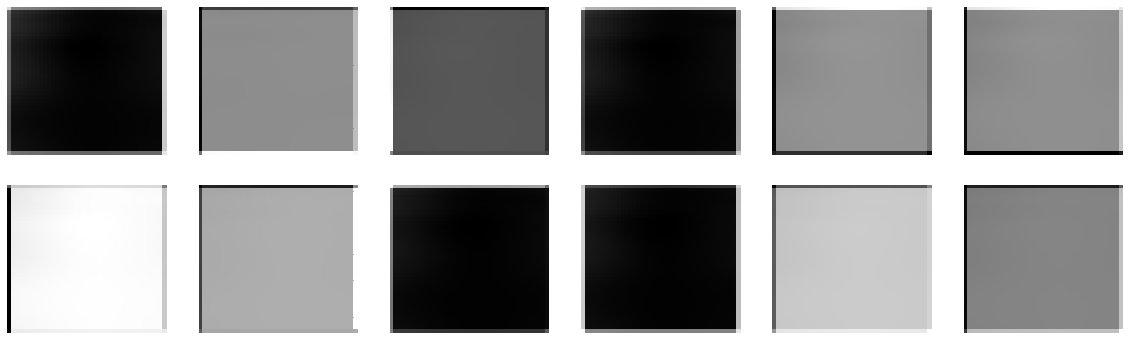

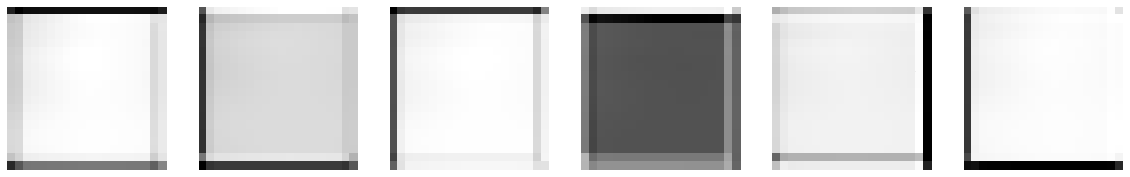

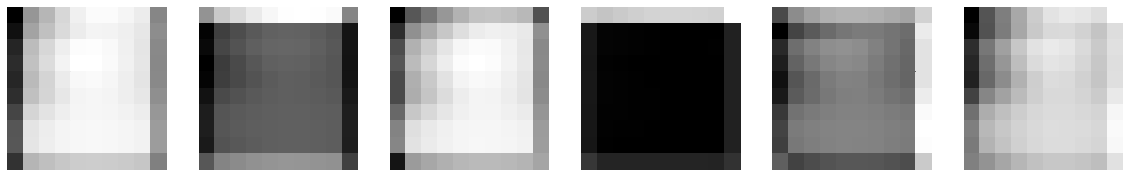

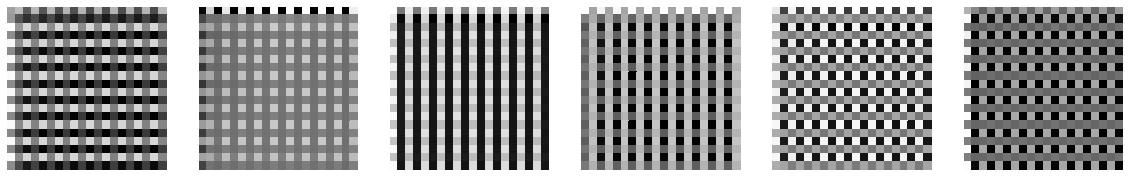

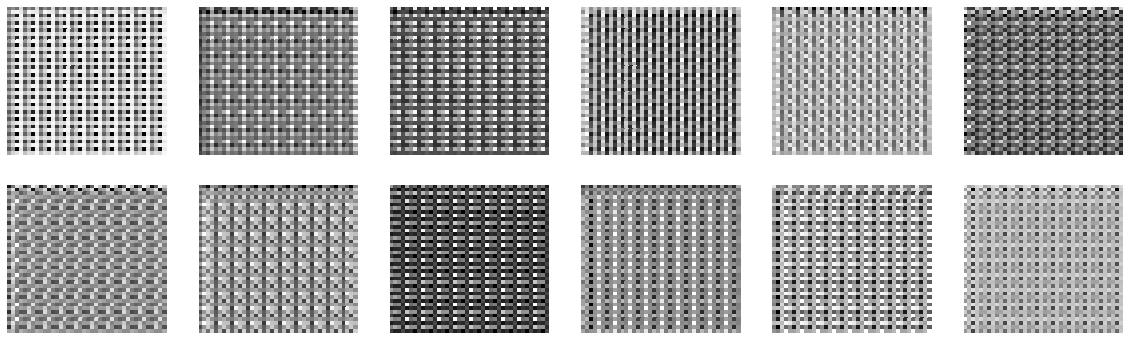

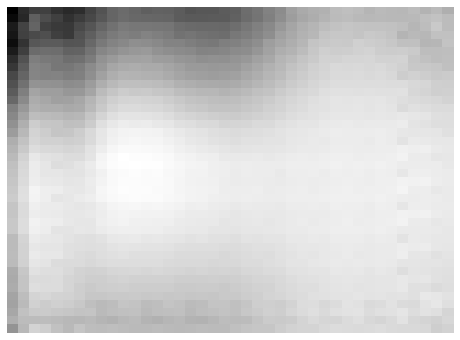

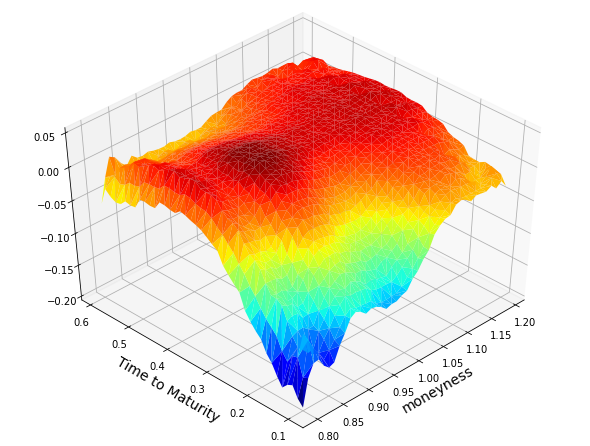

In [0]:
import seaborn as sns
figurenew1 = plt.figure(10)
fig1 = Matrix2suf(X_test[1010].reshape(40,40))
ax = Axes3D(figurenew1)
ax.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness',fontsize=14)
plt.ylabel('Time to Maturity',fontsize=14)
ax.view_init(45, -135)

plt.figure(11)
sns.heatmap(X_test[1010].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)


plt.rcParams['figure.figsize'] = (20, 6)

layer = np.transpose(conv_output(autoencoder,'EncodeConv1',X_test[1010].reshape(1,40,40,1))[0])
plt.figure(1)
for i in range(len(layer)):
  plt.subplot(2,len(layer)/2,i+1)
  sns.heatmap(layer[i],cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (20, 3)
layer = np.transpose(conv_output(autoencoder,'EncodeConv2',X_test[1010].reshape(1,40,40,1))[0])
plt.figure(2)
for i in range(len(layer)):
  plt.subplot(1,len(layer),i+1)
  sns.heatmap(layer[i],cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (20, 3)
layer = np.transpose(conv_output(autoencoder,'Encoder',X_test[1010].reshape(1,40,40,1))[0])
plt.figure(3)
for i in range(len(layer)):
  plt.subplot(1,len(layer),i+1)
  sns.heatmap(layer[i],cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (20, 3)
layer = np.transpose(conv_output(autoencoder,'DecodedConv1',X_test[1010].reshape(1,40,40,1))[0])
plt.figure(4)
for i in range(len(layer)):
  plt.subplot(1,len(layer),i+1)
  sns.heatmap(layer[i],cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)
  
plt.rcParams['figure.figsize'] = (20, 6)
layer = np.transpose(conv_output(autoencoder,'DecodedConv2',X_test[1010].reshape(1,40,40,1))[0])
plt.figure(5)
for i in range(len(layer)):
  plt.subplot(2,len(layer)/2,i+1)
  sns.heatmap(layer[i],cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)


layer = np.transpose(conv_output(autoencoder,'Decoded',X_test[1010].reshape(1,40,40,1))[0])
plt.rcParams['figure.figsize'] = (8, 6)
plt.figure(6)
for i in range(len(layer)):
  plt.subplot(1,len(layer),i+1)
  sns.heatmap(layer[i].T,cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)
  fig1 = Matrix2suf(layer[i].reshape(40,40))
figurenew=plt.figure()
ax = Axes3D(figurenew)
ax.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness',fontsize=14)
plt.ylabel('Time to Maturity',fontsize=14)
ax.view_init(45, -135)

In [0]:
layer[0].shape

(40, 40)

In [0]:
from keras import backend as K
def conv_filter(model, layer_name, img):
    """Get the filter of conv layer.

    Args:
           model: keras model.
           layer_name: name of layer in the model.
           img: processed input image.

    Returns:
           filters.
    """
    # this is the placeholder for the input images
    input_img = model.input

    # get the symbolic outputs of each "key" layer (we gave them unique names).
    layer_dict = dict([(layer.name, layer) for layer in model.layers[1:]])

    try:
        layer_output = layer_dict[layer_name].output
    except:
        raise Exception('Not layer named {}!'.format(layer_name))

    kept_filters = []
    for i in range(layer_output.shape[-1]):
        loss = K.mean(layer_output[:, :, :, i])

        # compute the gradient of the input picture with this loss
        grads = K.gradients(loss, input_img)[0]

        # normalization trick: we normalize the gradient
        grads = normalize(grads)

        # this function returns the loss and grads given the input picture
        iterate = K.function([input_img], [loss, grads])

        # step size for gradient ascent
        step = 1.
        # run gradient ascent for 20 steps
        fimg = img.copy()

        for j in range(20):
            loss_value, grads_value = iterate([fimg])
            fimg += grads_value * step

        # decode the resulting input image
        fimg = deprocess_image(fimg[0])
        kept_filters.append((fimg, loss_value))

        # sort filter result
        kept_filters.sort(key=lambda x: x[1], reverse=True)

    return np.array([f[0] for f in kept_filters])

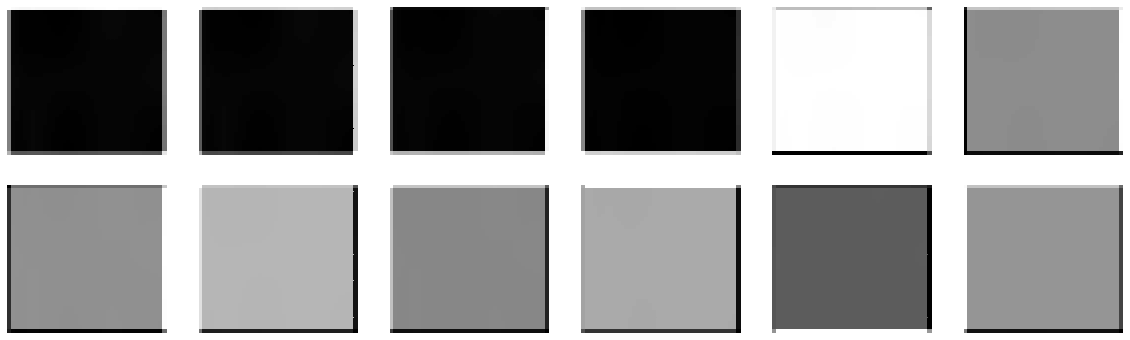

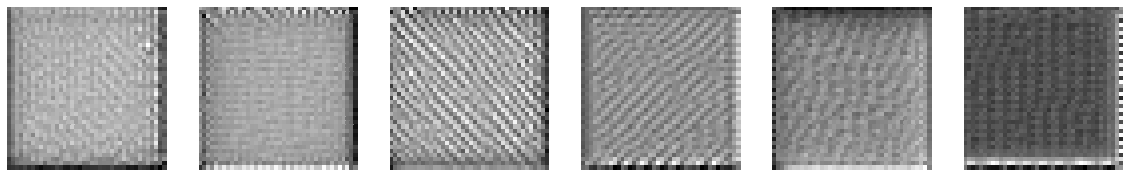

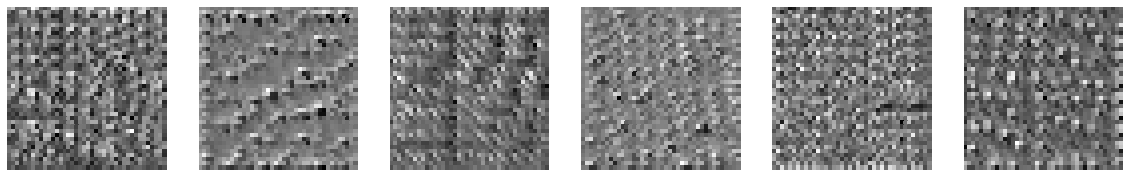

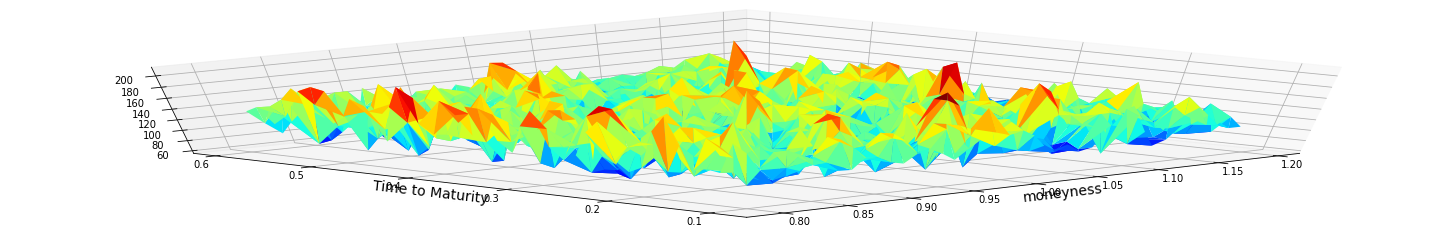

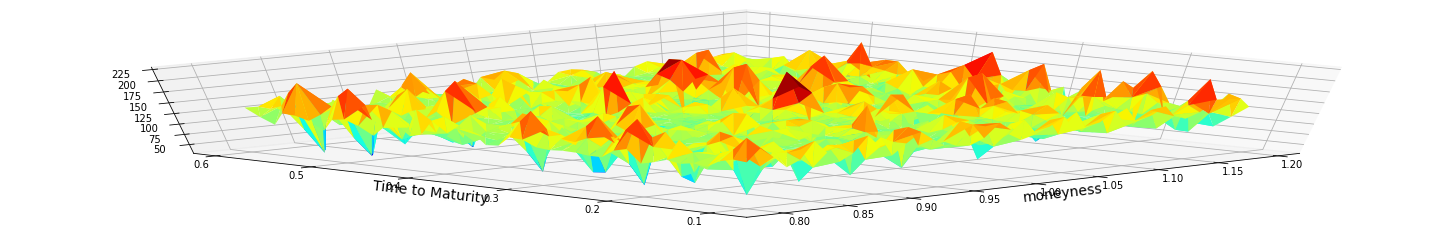

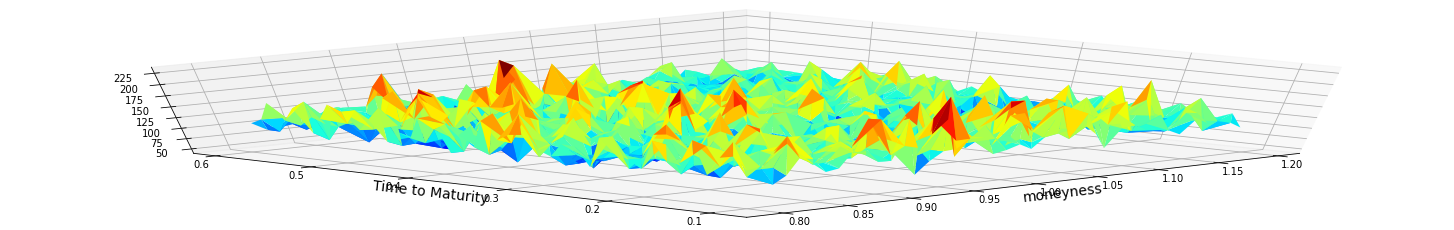

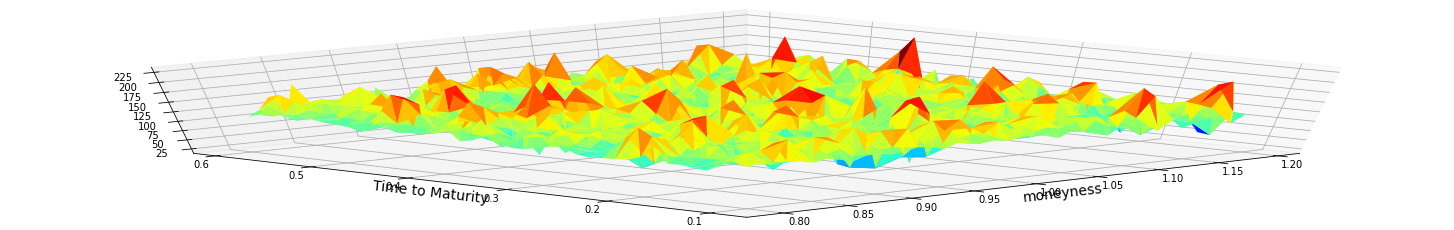

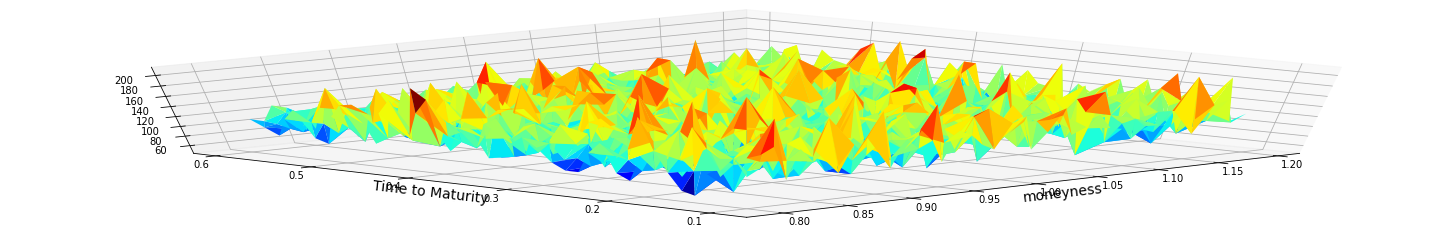

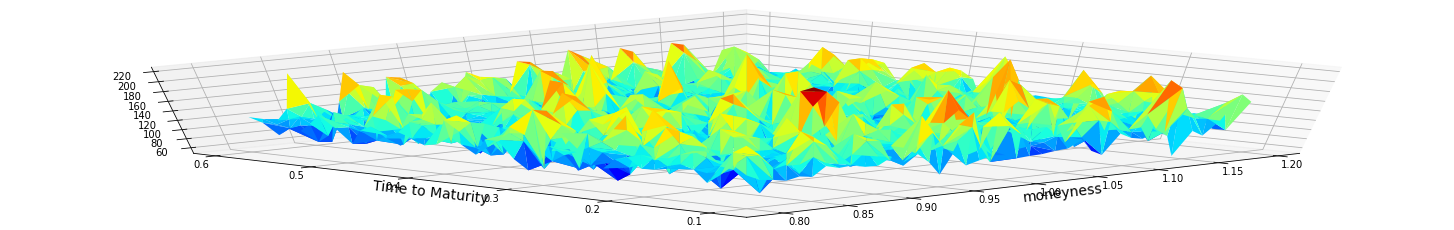

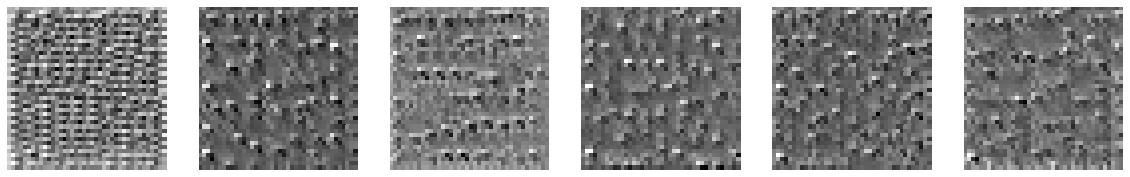

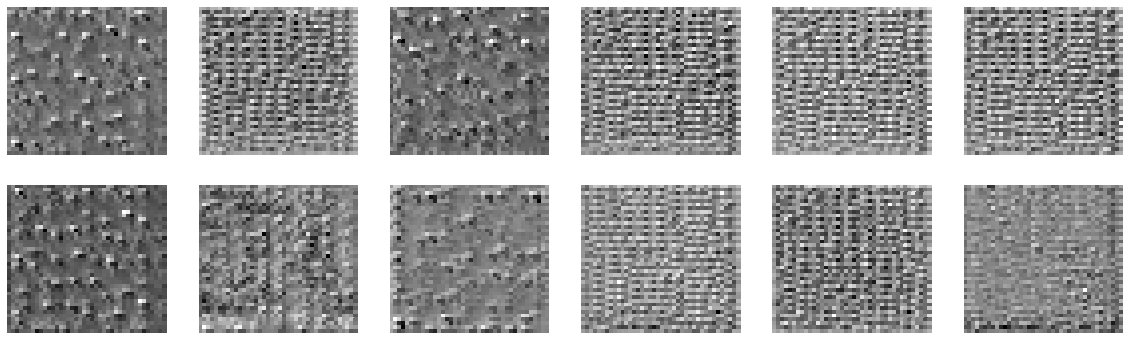

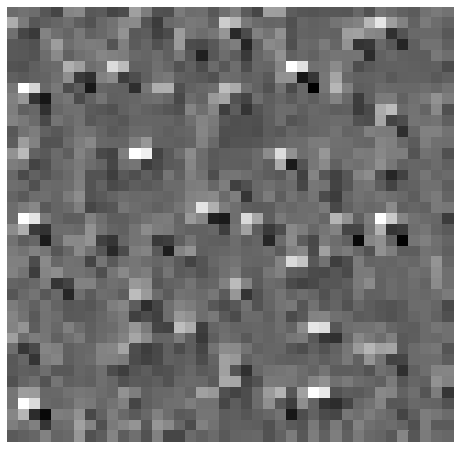

In [0]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (20, 6)
plt.figure(1)
F = conv_filter(autoencoder,'EncodeConv1',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(2,len(F)/2,i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (20, 3)
plt.figure(2)
F = conv_filter(autoencoder,'EncodeConv2',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(1,len(F),i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)


plt.rcParams['figure.figsize'] = (20, 3)
plt.figure(3)
F = conv_filter(autoencoder,'Encoder',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(1,len(F),i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)
for i in range(len(F)):
  fig1 = Matrix2suf(F[i].reshape(40,40))
  figurenew=plt.figure(10+i)
  ax = Axes3D(figurenew)
  ax.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=14)
  plt.ylabel('Time to Maturity',fontsize=14)
  ax.view_init(45, -135)



plt.rcParams['figure.figsize'] = (20, 3)
plt.figure(4)
F = conv_filter(autoencoder,'DecodedConv1',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(1,len(F),i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (20, 6)
plt.figure(5)
F = conv_filter(autoencoder,'DecodedConv2',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(2,len(F)/2,i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

plt.rcParams['figure.figsize'] = (8, 8)
plt.figure(6)
F = conv_filter(autoencoder,'Decoded',X_test[1208].reshape(1,40,40,1))
for i in range(len(F)):
  plt.subplot(1,len(F),i+1)
  sns.heatmap(F[i].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False)

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from keras import backend as K




def deprocess_image(x):
    """util function to convert a tensor into a valid image.
    Args:
           x: tensor of filter.
    Returns:
           x: deprocessed tensor.
    """
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')

    return x


def normalize(x):
    """utility function to normalize a tensor by its L2 norm
    Args:
           x: gradient.
    Returns:
           x: gradient.
    """
    return x / (K.sqrt(K.mean(K.square(x))) + K.epsilon())

这里开始我们做K-Means的聚类分析工作

1.   List item
2.   List item




# 测试工作

# New Section

# New Section

In [0]:
optimizer_list=['Adadelta']#'adam','sgd','RMSprop','Adagrad','Adadelta'

In [0]:
import keras
from keras.callbacks import TensorBoard
for optimizers in optimizer_list:
  tbCallBack = TensorBoard(log_dir="drive/My Drive/model/"+str(optimizers), histogram_freq=0,write_grads=True,write_images=True,write_graph=True)
  autoencoder.compile(optimizer=str(optimizers), loss='mse')
  history = autoencoder.fit(X_train, X_train, epochs=1000,verbose=2,batch_size=300,validation_split=0.2, shuffle =True,callbacks=[tbCallBack])

Train on 967 samples, validate on 242 samples
Epoch 1/1000
 - 0s - loss: 3.6258 - val_loss: 2.2566
Epoch 2/1000
 - 0s - loss: 1.1573 - val_loss: 0.4352
Epoch 3/1000
 - 0s - loss: 0.4863 - val_loss: 0.2872
Epoch 4/1000
 - 0s - loss: 0.3895 - val_loss: 0.2309
Epoch 5/1000
 - 0s - loss: 0.3285 - val_loss: 0.2173
Epoch 6/1000
 - 0s - loss: 0.3011 - val_loss: 0.2059
Epoch 7/1000
 - 0s - loss: 0.2835 - val_loss: 0.1872
Epoch 8/1000
 - 0s - loss: 0.2556 - val_loss: 0.1753
Epoch 9/1000
 - 0s - loss: 0.2349 - val_loss: 0.1498
Epoch 10/1000
 - 0s - loss: 0.2031 - val_loss: 0.1299
Epoch 11/1000
 - 0s - loss: 0.1825 - val_loss: 0.1384
Epoch 12/1000
 - 0s - loss: 0.1866 - val_loss: 0.1261
Epoch 13/1000
 - 0s - loss: 0.1708 - val_loss: 0.1112
Epoch 14/1000
 - 0s - loss: 0.1570 - val_loss: 0.1084
Epoch 15/1000
 - 0s - loss: 0.1507 - val_loss: 0.0949
Epoch 16/1000
 - 0s - loss: 0.1330 - val_loss: 0.0958
Epoch 17/1000
 - 0s - loss: 0.1338 - val_loss: 0.0809
Epoch 18/1000
 - 0s - loss: 0.1140 - val_loss

<Figure size 1152x432 with 0 Axes>

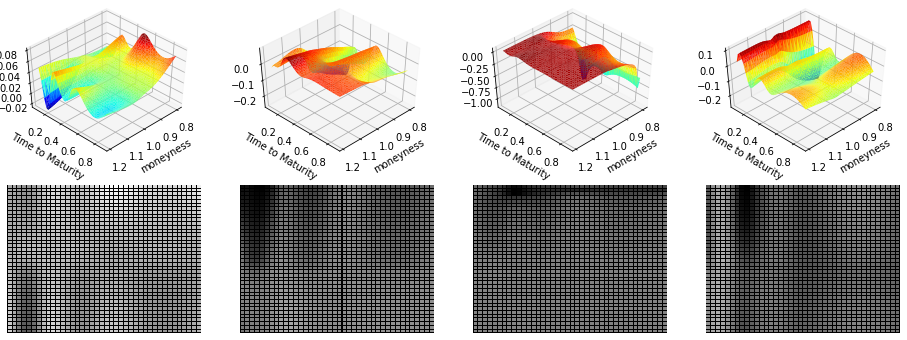

In [0]:
plt.figure(0)
plt.rcParams['figure.figsize'] = (16, 6)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=10, hspace=None)
import seaborn as sns

k=1205
fig = plt.figure()
for i in range(4):
  k=1000+i*62
  ax1 = fig.add_subplot(2, 4, 1+i, projection='3d')
  fig1 = Matrix2suf(X_test[k].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
  plt.xlabel('moneyness')
  plt.ylabel('Time to Maturity')
  ax1.view_init(45, 45)
  ax1 = fig.add_subplot(2, 4, 5+i)
  sns.heatmap(X_test[k].reshape(40,40),cmap=cm.gray,xticklabels=False,yticklabels=False,cbar=False,linewidth=0.004,center=2,linecolor='black')

In [0]:
fig1

array([[0.8       , 0.8       , 0.8       , ..., 1.19      , 1.19      ,
        1.19      ],
       [0.1       , 0.12      , 0.14      , ..., 0.84      , 0.86      ,
        0.88      ],
       [1.74669814, 1.80571151, 1.85043371, ..., 2.03376842, 2.02632809,
        2.01918149]])

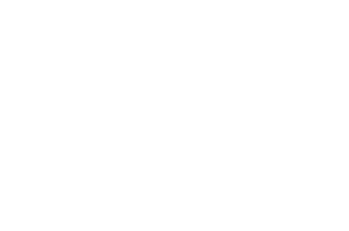

In [0]:
plt.axis('off')
frame = plt.gca()
# y 轴不可见
frame.axes.get_yaxis().set_visible(False)
# x 轴不可见
frame.axes.get_xaxis().set_visible(False)

这里开始是调试



# K-means

In [0]:
from keras.datasets import mnist
import numpy as np
np.random.seed(10)
from time import time
import numpy as np
import keras.backend as K
from keras.engine.topology import Layer, InputSpec
from keras.layers import Dense, Input
from keras.models import Model
from keras.optimizers import SGD
from keras import callbacks
from keras.initializers import VarianceScaling
from sklearn.cluster import KMeans

## 新模型


In [0]:
print(X_train.shape, X_test.shape)

input_img = Input(shape=(40,40,1))
x1 = Conv2D(12,(3,3), padding='same',name='EncodeConv1')(input_img)#activation='relu'
x1 = keras.layers.LeakyReLU(alpha=0.2)(x1)
x2 = MaxPooling2D((2,2), padding='same',name = 'MaxPooling')(x1)
x3 = Conv2D(6,(3,3),  padding='same',name='EncodeConv2')(x2)#activation='relu',
x3 = keras.layers.LeakyReLU(alpha=0.2)(x3)
encoded = MaxPooling2D((2,2), padding='same', name='Encoder')(x3)
#encoded =  Conv2D(3,(1,1), activation='relu', padding='same')(x2)

y1 = keras.layers.convolutional.Conv2DTranspose(6, (3,3), strides=(2, 2), padding='same',name='DecodedConv1')(encoded)
y1 = keras.layers.LeakyReLU(alpha=0.2)(y1)
y2 = keras.layers.convolutional.Conv2DTranspose(12, (3,3), strides=(2, 2), padding='same',name='DecodedConv2')(y1)
x2 = keras.layers.LeakyReLU(alpha=0.2)(y2)
#y1 = Conv2D(20, (3, 3), activation='relu', padding='same',name='DecodedConv1')(encoded)
#y2 = UpSampling2D((2, 2),name = 'UpSampling1')(y1)
#y3 = Conv2D(16, (3, 3), activation='relu', padding='same',name='DecodedConv2')(y2)
#y4 = UpSampling2D((2, 2),name = 'UpSampling2')(y3)
decoded = Conv2D(1, (3, 3), activation='relu', padding='same', name='Decoded')(x2)
autoencoder = Model(input_img, decoded)
autoencoder.summary()

(1209, 40, 40, 1) (1209, 40, 40, 1)


RuntimeError: ignored

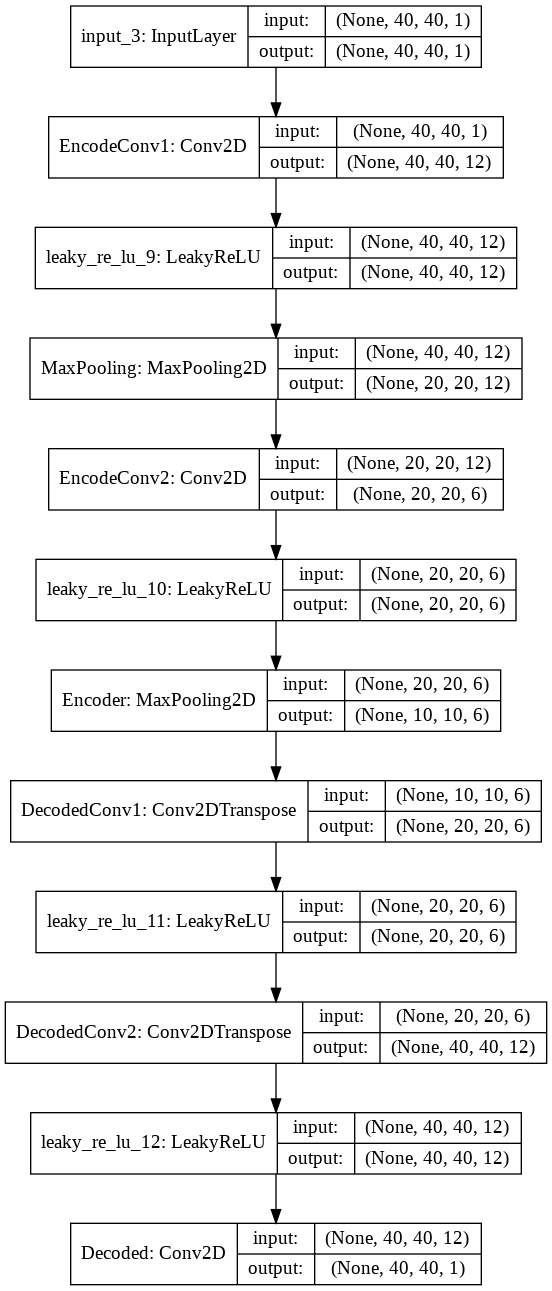

In [0]:
from keras.utils import plot_model
plot_model(autoencoder, to_file='drive/My Drive/THESIS/model.png',rankdir='TB',show_shapes=True,expand_nested=True)

In [0]:
tbCallBack = TensorBoard(log_dir="drive/My Drive/model", histogram_freq=0,write_grads=True,write_images=True,write_graph=True)
import keras
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X_train, X_train, epochs=3000,verbose=2,batch_size=300,validation_split=0.2, shuffle =True,callbacks=[tbCallBack])

Streaming output truncated to the last 5000 lines.
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 502/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 503/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 504/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 505/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 506/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 507/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 508/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 509/3000
 - 0s - loss: 0.0047 - val_loss: 0.0026
Epoch 510/3000
 - 0s - loss: 0.0047 - val_loss: 0.0025
Epoch 511/3000
 - 0s - loss: 0.0047 - val_loss: 0.0025
Epoch 512/3000
 - 0s - loss: 0.0047 - val_loss: 0.0025
Epoch 513/3000
 - 0s - loss: 0.0047 - val_loss: 0.0025
Epoch 514/3000
 - 0s - loss: 0.0046 - val_loss: 0.0025
Epoch 515/3000
 - 0s - loss: 0.0047 - val_loss: 0.0025
Epoch 516/3000
 - 0s - loss: 0.0046 - val_loss: 0.0025
Epoch 517/3000
 - 0s - loss: 0.0046 - val_loss: 0.0025
Epoch 518/3000
 - 0s - loss: 

In [0]:
autoencoder.save('drive/My Drive/THESIS/autoencoder_12_6.h5')

In [9]:
autoencoder = keras.models.load_model('drive/My Drive/THESIS/autoencoder_12_6.h5')

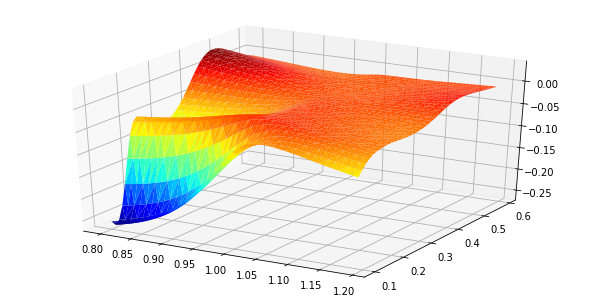

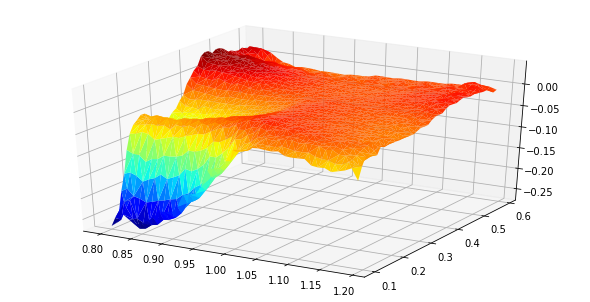

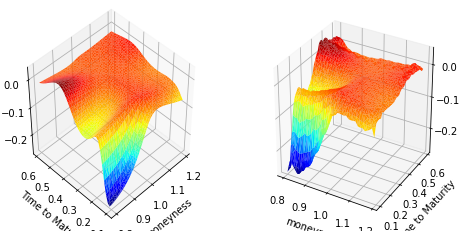

In [0]:
def Matrix2suf(M):
  xyz = np.zeros((3,M.shape[0]*M.shape[1]))
  for i in range(M.shape[0]):
    for j in range(M.shape[1]):
      xyz[0,M.shape[1]*i+j] = 0.8+i/40*0.4
      xyz[1,M.shape[1]*i+j] = 0.1+j/40*0.5
      xyz[2,M.shape[1]*i+j] = M[i,j]
  return xyz
plt.rcParams['figure.figsize'] = (8, 4)
k=1201
##aaa = X_test[k]
#aaa_a= autoencoder.predict(aaa.reshape(1,40,40,1))
#plt.subplot(1,2,1)
#plt.imshow(aaa_a.reshape(40,40))
#plt.subplot(1,2,2)
#plt.imshow(X_test[k].reshape(40,40))
fig1 = Matrix2suf(X_test[k].reshape(40,40))

fig_original=plt.figure()
ax = Axes3D(fig_original)
ax.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)

fig2 = Matrix2suf(autoencoder.predict(X_test[k].reshape(1,40,40,1)).reshape(40,40))
fig_model=plt.figure()
ax = Axes3D(fig_model)
ax.plot_trisurf(fig2[0,],fig2[1,],fig2[2,]-2, cmap=cm.jet)

fig = plt.figure()
fig1 = Matrix2suf(X_test[k].reshape(40,40))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_trisurf(fig1[0,],fig1[1,],fig1[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness')
plt.ylabel('Time to Maturity')
ax1.view_init(45, -135)

fig2 = Matrix2suf(autoencoder.predict(X_test[k].reshape(1,40,40,1)).reshape(40,40))
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_trisurf(fig2[0,],fig2[1,],fig2[2,]-2, cmap=cm.jet)
plt.xlabel('moneyness')
plt.ylabel('Time to Maturity')
ax1.view_init(45, -135)


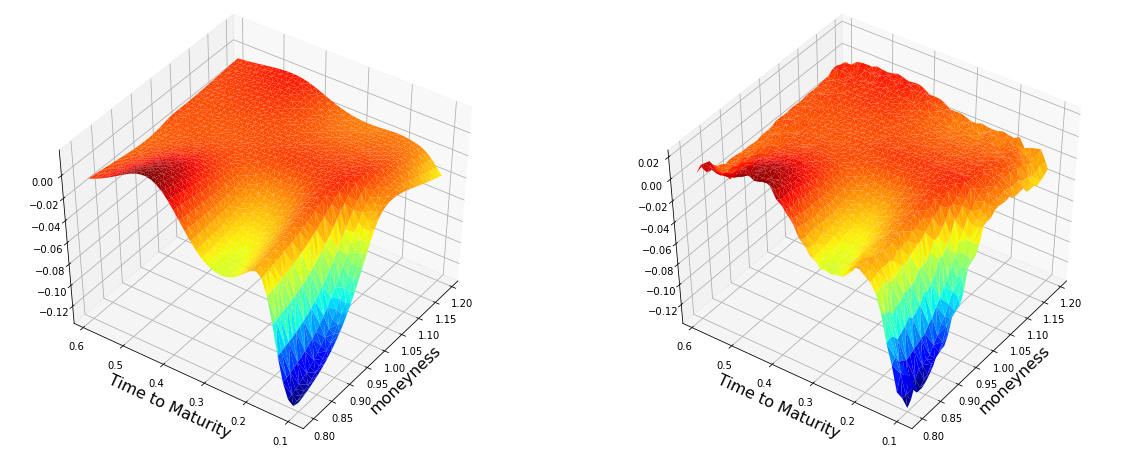

In [0]:

fig = plt.figure()
for i in range(1):
  ax1 = fig.add_subplot(1, 2, 1, projection='3d')
  fig1 = Matrix2suf(X_test[k[i]].reshape(40,40))
  ax1.plot_trisurf(fig1[0,],fig1[1,],0.5*(fig1[2,]-2), cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=16)
  plt.ylabel('Time to Maturity',fontsize=16)
  ax1.view_init(45, -145)

  ax2 = fig.add_subplot(1, 2, 2, projection='3d')
  fig2 = Matrix2suf(autoencoder.predict(X_test[k].reshape(1,40,40,1)).reshape(40,40))
  ax2.plot_trisurf(fig2[0,],fig2[1,],0.5*(fig2[2,]-2), cmap=cm.jet)
  plt.xlabel('moneyness',fontsize=16)
  plt.ylabel('Time to Maturity',fontsize=16)
  ax2.view_init(45, -145)


In [0]:
encoder = Model(inputs=input_img, outputs=encoded, name='encoder')

NameError: ignored

In [0]:

n_clusters=8
clustering_layer = ClusteringLayer(n_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)
model.compile(optimizer='adam', loss='kld')

ValueError: ignored

In [0]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

X_digits, y_digits = load_digits(return_X_y=True)

In [0]:
y_digits

array([0, 1, 2, ..., 8, 9, 8])

n_digits: 10, 	 n_samples 1797, 	 n_features 64
__________________________________________________________________________________
init		time	inertia	homo	compl	v-meas	ARI	AMI	silhouette
k-means++	0.41s	69510	0.610	0.657	0.633	0.481	0.629	0.129
random   	0.29s	69907	0.633	0.674	0.653	0.518	0.649	0.131
PCA-based	0.07s	70768	0.668	0.695	0.681	0.558	0.678	0.142
__________________________________________________________________________________


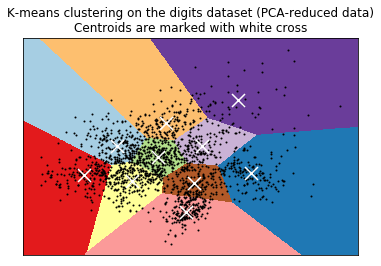